In [1]:
#Import the libraries to use
import pandas as pd
import random
import matplotlib.pyplot as plt

In [5]:
y_increment = .25
starting_data_points = 12000

In [7]:
#This function is used to remove a certain percentage of the data, or to thin it
def get_removal_chance(removal_percent=.2):
    rem = removal_percent
    binary_lst = [0,1]
    removal_weight = [rem,1-rem]
    removal = random.choices(binary_lst,removal_weight)[0]
    return(removal)

In [18]:
#I am going to have 3 variables that effect the solution but when making the data I need to work backwards
#First I need to populate the solution, y, and then set the relationship with the variables
#One variable will have a ratio of 1.75, another 42.69, to have a scale difference, and the last, -2.5
w=[]
x=[]
y=[]
z=[]
remove=[]
for point in range(starting_data_points):
    y.append((point+1)*y_increment)
    w.append(y[point]*(1.75))
    x.append(y[point]*(69.42))
    z.append(y[point]*(-2.5))
    remove.append(get_removal_chance(.75))

dict = {'solution':y,'var_1':w,'var_2':x,'var_3':z,'removal_odds':remove}
m_l=pd.DataFrame(dict)

In [19]:
var_1 = 1.6*m_l['var_1']
var_2 = .03*m_l['var_2']
var_3 = 1.8*m_l['var_3']
m_l['new_solution'] = var_1 + var_2 + var_3                                  

In [29]:
m_l['decider'] = m_l['new_solution'].apply(lambda x: 1 if x >= 625 else 0)
#simple_linear_light['answer'] = simple_linear_light['variable'].apply(lambda x: 1 if x >= 750 else 0)

In [30]:
m_l.describe()

,solution,var_1,var_2,var_3,removal_odds,new_solution,decider
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,1500.125000,2625.218750,104138.677500,-3750.312500,0.247083,573.947825,0.455500
std,866.061487,1515.607603,60121.988457,2165.153719,0.431334,331.355125,0.498037
min,0.250000,0.437500,17.355000,-7500.000000,0.000000,0.095650,0.000000
25%,750.187500,1312.828125,52078.016250,-5625.156250,0.000000,287.021737,0.000000
50%,1500.125000,2625.218750,104138.677500,-3750.312500,0.000000,573.947825,0.000000
75%,2250.062500,3937.609375,156199.338750,-1875.468750,0.000000,860.873912,1.000000
max,3000.000000,5250.000000,208260.000000,-0.625000,1.000000,1147.800000,1.000000


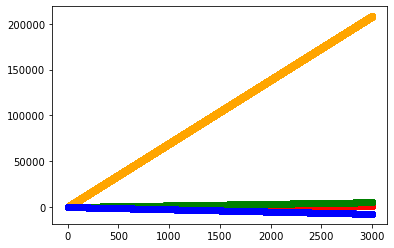

In [31]:
plt.scatter(m_l['solution'],m_l['new_solution'],c='red')
plt.scatter(m_l['solution'],m_l['var_1'],c='green')
plt.scatter(m_l['solution'],m_l['var_2'],c='orange')
plt.scatter(m_l['solution'],m_l['var_3'],c='blue')

In [46]:
def randomizer(stabilizer):
    pos_or_neg_lst = [-1,1]
    population = [1,1.5,2,2.5,3,4,5,10]
    weight = [32.5,20,15,10,9,7.5,5,.5]
    rand = random.random()
    get_pos_or_neg = float(random.choice(pos_or_neg_lst))
    multiplier = random.choices(population,weight,k=1)
    random_number = stabilizer*rand*get_pos_or_neg*multiplier[0]
    return(random_number)

In [43]:
#m_l['var_1'].quantile(.25)
var_1_10 = m_l['var_1'].quantile(.10)
var_2_10 = m_l['var_2'].quantile(.10)
var_3_10 = m_l['var_3'].quantile(.10)

In [ ]:
m_l['new_var_1'] = m_